In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt
from matplotlib import animation, rc
from mpl_toolkits import mplot3d
import random as random

In [3]:
class Robot():
    
    #Class for the robot with lengths of links and the axis defined as they would be in the defalt zero position
    
    def __init__(self, links = [.25,1,1,.1], axis = [[0,0,1],[0,1,0],[0,1,0],[0,1,0]]):
        self.links = links
        self.axis = axis
        
    def rotateAxis(self, t, vec):
        
        #Rotation matrix just taken straight from wikepedia
        
        C = 1-np.cos(t);
        x,y,z = vec;

        Rot = [[x**2*C+np.cos(t), x*y*C-z*np.sin(t), z*x*C+y*np.sin(t)],
                [x*y*C+z*np.sin(t), y**2*C+np.cos(t), z*y*C-x*np.sin(t)],
                [x*z*C-y*np. sin(t), y*z*C+x*np.sin(t), z**2*C+np.cos(t)]]

        return Rot

    def findEnd(self, angles):
        #This function takes an input vector of angles and will output the end position as
        #well as all of the vectors of the robot NOT TRANSLATED FROM THE ORIGIN
        
        v1 = [0,0,0]
        v2 = [0,0,0]
        v3 = [0,0,0]
        v4 = [0,0,0]
        
        #Starting Vector
        v1_0 = [self.links[0]/np.sqrt(2),0,self.links[0]/np.sqrt(2)];
        
        #First rotation
        v1 = np.dot(v1_0,self.rotateAxis(angles[0], self.axis[0]));
        axis1 = np.dot(self.axis[1],self.rotateAxis(angles[0], self.axis[0]));
        axis2 = np.dot(self.axis[2],self.rotateAxis(angles[0], self.axis[0]));
        axis3 = np.dot(self.axis[3],self.rotateAxis(angles[0], self.axis[0]));

        #Second Rotation
        v2 = (self.links[1]/self.links[0])*np.dot(v1,self.rotateAxis(angles[1], axis1));
        axis2 = np.dot(axis2,self.rotateAxis(angles[1], axis1));
        axis3 = np.dot(axis3,self.rotateAxis(angles[1], axis1));

        #Third Rotation
        v3 = (self.links[2]/self.links[1])*np.dot(v2,self.rotateAxis(angles[2], axis2));
        axis3 = np.dot(axis3,self.rotateAxis(angles[2], axis2));

        #Fourth rotation
        axis3 = np.dot(axis3,self.rotateAxis(angles[3], v3));

        #Fifth Rotation
        v4 = (self.links[3]/self.links[2])*np.dot(v3,self.rotateAxis(angles[4], axis3));
        
        x_val = v1[0]+v2[0]+v3[0]+v4[0]
        y_val = v1[1]+v2[1]+v3[1]+v4[1]
        z_val = v1[2]+v2[2]+v3[2]+v4[2]
        
        return [x_val, y_val, z_val, v1, v2, v3, v4]
    
    def distanceFromTarget(self,targ,angles):
        
        #Simply finds the distance between a given end from a set of angles and a target end point
        
        end = self.findEnd(angles)
        dist = (end[0]-targ[0])**2+(end[1]-targ[1])**2+(end[2]-targ[2])**2
        
        return dist
    



In [4]:
#Defining a instance of the robot
links = [.25,1,1,.1]
axis = [[0,0,1],[0,1,0],[0,1,0],[0,1,0]]
anglesDesired = [np.pi/4,0,0,np.pi/2,np.pi/2]

#Changing from normal physics conventions of angle definition to the way the robot defines them:
anglesConvention = [-1*anglesDesired[0],(np.pi/4-anglesDesired[1]),\
                    (-np.pi/2+anglesDesired[2]),anglesDesired[3],-1*anglesDesired[4]]

Moto = Robot(links = links, axis = axis)
End = Moto.findEnd(anglesConvention)
print([End[0],End[1],End[2]])



[0.9028174593052025, 0.7613961030678927, 1.176776695296637]


In [5]:
def drawRobot(v1,v2,v3,v4):
    
    #I guess the name of this function is deceptive but it takes the vectors and translates them essentially
    
    x = np.zeros(100,)
    y = np.zeros(100,)
    z = np.zeros(100,)

    # This is an admittedly weird way to do this, but it is what it is.
    # The process is like walking along in the direction of vectors 1-4 until you reach the end
    # The magnitude of the links are arbitrary but the relative size is still normal as defined
    
    for i in range(100):
        if i <= 24:
            x[i] = i*v1[0]
            y[i] = i*v1[1]
            z[i] = i*v1[2]
        elif i > 24 and i<=49:
            x[i] = 24*v1[0] + (i-24)*v2[0]
            y[i] = 24*v1[1] + (i-24)*v2[1]
            z[i] = 24*v1[2] + (i-24)*v2[2]
        elif i > 49 and i<=74:
            x[i] = 24*v1[0] + 25*v2[0]+ (i-49)*v3[0]
            y[i] = 24*v1[1] + 25*v2[1]+ (i-49)*v3[1]
            z[i] = 24*v1[2] + 25*v2[2]+ (i-49)*v3[2]
        else:
            x[i] = 24*v1[0] + 25*v2[0] + 25*v3[0] + (i-74)*v4[0]
            y[i] = 24*v1[1] + 25*v2[1] + 25*v3[1] + (i-74)*v4[1]
            z[i] = 24*v1[2] + 25*v2[2] + 25*v3[2] + (i-74)*v4[2]

    
    return x,y,z

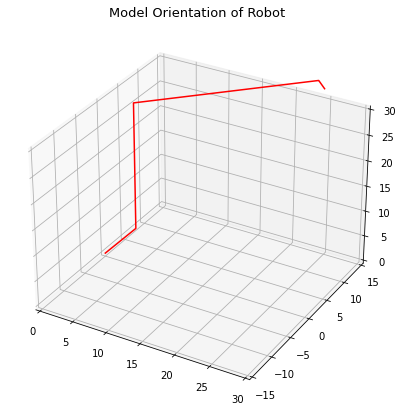

In [6]:
#Show on a 3D plot

v1,v2,v3,v4 = End[3],End[4],End[5],End[6]

x,y,z = drawRobot(v1,v2,v3,v4)
             
#print(x)
#print(y)
#print(z) 


# creating an empty canvas
fig = plt.figure(figsize = (7,7))

# defining the axes with the projection
# as 3D so as to plot 3D graphs
ax = plt.axes(projection="3d")
ax.set_xlim(0,30)
ax.set_ylim(-15,15)
ax.set_zlim(0,30)

# plotting a 3D line graph with X-coordinate,
# Y-coordinate and Z-coordinate respectively
ax.plot3D(x,y,z, 'red')


 
# Showing the above plot
plt.title('Model Orientation of Robot',fontsize=13)
plt.show()

In [15]:
#Try some hill climbing
links = [.25,1,1,.1]
axis = [[0,0,1],[0,1,0],[0,1,0],[0,1,0]]
anglesDesired = [np.pi/4,0,0,np.pi/2,np.pi/2]
anglesConvention = [-1*anglesDesired[0],(np.pi/4-anglesDesired[1]),\
                    (-np.pi/2+anglesDesired[2]),anglesDesired[3],-1*anglesDesired[4]]
Moto = Robot(links = links, axis = axis)
End = Moto.findEnd(anglesConvention)
print(End)
Target = [End[0],End[1],End[2]]

angles_start = np.array([anglesConvention[0]-.25,anglesConvention[1]+.25,\
                   anglesConvention[2]-.25,anglesConvention[3]+.25,anglesConvention[4]-.25])
angles = np.array([anglesConvention[0]-.25,anglesConvention[1]+.25,\
                   anglesConvention[2]-.25,anglesConvention[3]+.25,anglesConvention[4]-.25])

#Step size for the hill searching
step = .1

print(angles)
    
dist = Moto.distanceFromTarget(Target,angles)   
print(dist)

for i in range(1000): #Hill climb starts
    
    #print(angles)
    dist = Moto.distanceFromTarget(Target,angles) #Try something
    print(dist)
    
    #look somewhere else
    angles_test = [angles[0]+step*random.uniform(-1,1),angles[1]+step*random.uniform(-1,1),\
                   angles[2]+step*random.uniform(-1,1),angles[3]+step*random.uniform(-1,1),angles[4]+step*random.uniform(-1,1)]
    #print(angles_test)
    dist_test = Moto.distanceFromTarget(Target,angles_test) #try that
    
    #What it better?
    if dist_test<=dist:
        angles = angles_test;
        print('Angles Changed')
    else:
        continue
        
#print(angles)

[0.9028174593052025, 0.7613961030678927, 1.176776695296637, array([0.125    , 0.125    , 0.1767767]), array([-2.29934717e-17, -2.29934717e-17,  1.00000000e+00]), array([7.07106781e-01, 7.07106781e-01, 9.37500195e-17]), array([ 7.07106781e-02, -7.07106781e-02, -1.38441122e-17])]
[-1.03539816  1.03539816 -1.82079633  1.82079633 -1.82079633]
0.13102106412859202
0.13102106412859202
Angles Changed
0.09238623155823077
Angles Changed
0.07731118485641894
Angles Changed
0.051499856089211586
0.051499856089211586
Angles Changed
0.0360653827661051
0.0360653827661051
0.0360653827661051
Angles Changed
0.006596453089115706
0.006596453089115706
0.006596453089115706
0.006596453089115706
0.006596453089115706
0.006596453089115706
0.006596453089115706
0.006596453089115706
0.006596453089115706
0.006596453089115706
0.006596453089115706
0.006596453089115706
Angles Changed
0.0023239563839802502
0.0023239563839802502
0.0023239563839802502
0.0023239563839802502
0.0023239563839802502
0.0023239563839802502
0.0023

0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.000110811

0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.00011081192221583834
0.000110811

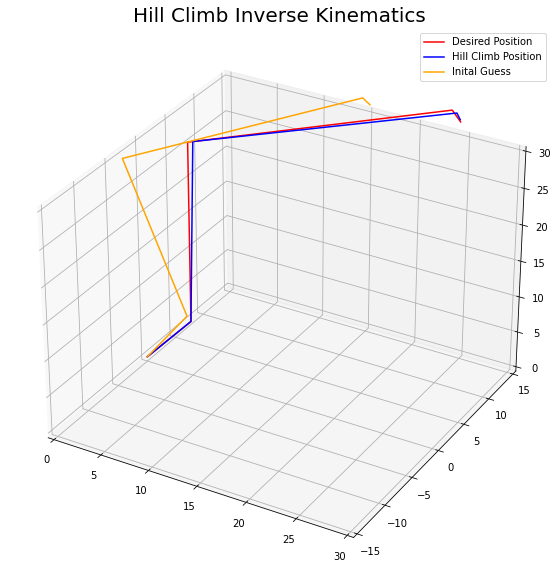

In [16]:
#Print everything on top of each other to see how good the hill climb is
Moto_hc = Robot(links = links, axis = axis)
End_hc = Moto_hc.findEnd(angles)
End_0 = Moto.findEnd(angles_start)

v1_hc,v2_hc,v3_hc,v4_hc = End_hc[3],End_hc[4],End_hc[5],End_hc[6]
x_hc,y_hc,z_hc = drawRobot(v1_hc,v2_hc,v3_hc,v4_hc)

v1_0, v2_0, v3_0, v4_0 = End_0[3],End_0[4],End_0[5],End_0[6]
x_0,y_0,z_0 = drawRobot(v1_0,v2_0,v3_0,v4_0)

#print(x)
#print(y)
#print(z) 


# creating an empty canvas
fig2 = plt.figure(figsize = (10,10))
 
# defining the axes with the projection
# as 3D so as to plot 3D graphs
ax2 = plt.axes(projection="3d")
ax2.set_xlim(0,30)
ax2.set_ylim(-15,15)
ax2.set_zlim(0,30)
# plotting a 3D line graph with X-coordinate,
# Y-coordinate and Z-coordinate respectively
ax2.plot3D(x,y,z,'red')
ax2.plot3D(x_hc,y_hc,z_hc,'blue')
ax2.plot3D(x_0,y_0,z_0,'orange')
ax2.legend(['Desired Position','Hill Climb Position','Inital Guess'])

 
# Showing the above plot
plt.title('Hill Climb Inverse Kinematics',fontsize=20)
plt.show()
